# Using GitHub Copilot as an Assistant for Time Series Analysis

This notebook demonstrates how to leverage GitHub Copilot as an AI-powered assistant to streamline your data science workflow. We will generate synthetic time series data representing temperature measurements and perform various analyses on this data. The goal is to showcase how Copilot can help automate code generation, documentation, and exploratory data analysis tasks.

## What Will We Do?

- Generate synthetic temperature time series data.
- Perform exploratory data analysis and visualization.
- Apply basic statistical and machine learning techniques to the data.
- Use Copilot to assist in code generation and documentation throughout the process.

## Requirements

### VS Code Add-ons

- **GitHub Copilot** extension for Visual Studio Code.
- **Jupyter** extension for running and editing notebooks.

### Python Libraries

Install the following Python libraries (you can use `pip install <package>`):

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`
- `jupyter`

### Activating and Configuring GitHub Copilot

1. **Install the GitHub Copilot extension** in Visual Studio Code.
2. **Sign in with your GitHub account** when prompted.
3. **Enable Copilot** in your workspace (check the status bar or use the command palette).
4. **Configure Copilot settings** as needed (e.g., suggestion frequency, language support).

### Free Access for University Students

GitHub Copilot is **free for verified students** through the [GitHub Student Developer Pack](https://education.github.com/pack). To activate:

1. Sign up for the Student Developer Pack with your university email.
2. Once verified, go to [GitHub Copilot settings](https://github.com/settings/copilot).
3. Enable Copilot for your account at no cost.

---

**Prompt used to generate this cell:**

> Este notebook va a estar destinado a mostrar el uso de copilot como asistente. Inicialmente crea un título adecuado, así como una explicación somera de lo que vamos a hacer: generar datos de prueba de una serie temporal de temperaturas y realizar diferentes análisis con ellos. También añade información sobre los requisitos necesarios: addons de vscode, librerías python a instalar, activación y configuración de Githup copilot, por ejemplo. Añade información sobre la gratuidad de github copilot para estudiantes universitarios y cómo activarlo.  El texto debe estar en inglés. Añade al final este texto para indicar el prompt que se usó para generarlo.

In [12]:
# Add a sinusoidal pattern with a frequency of 1 year to simulate seasonal variations
days_in_year = 365.25
seasonal_pattern = 10 * np.sin(2 * np.pi * np.arange(len(date_range)) / days_in_year)
temperature_df['Temperature'] += seasonal_pattern

# print the first few rows to verify the change
print(temperature_df.head())


            Temperature
Date                   
2020-01-01    24.967142
2020-01-02    18.789373
2020-01-03    26.820866
2020-01-04    35.746142
2020-01-05    18.346020


/tmp/ipykernel_202638/2376908137.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = temperature_df.resample('M').agg({'Temperature': ['mean', 'std']})


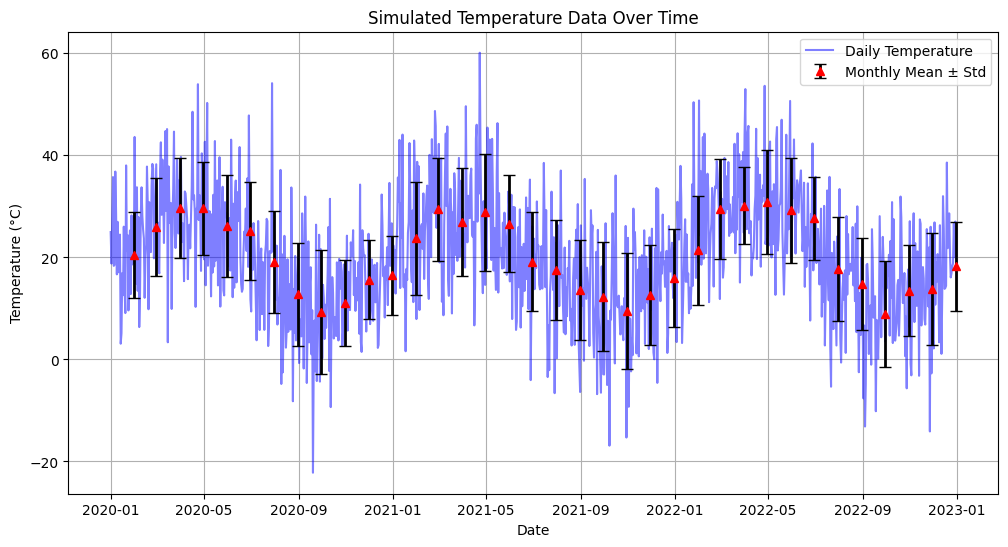

In [13]:
# Calculate monthly average and standard deviation
monthly_stats = temperature_df.resample('M').agg({'Temperature': ['mean', 'std']})
monthly_mean = monthly_stats['Temperature']['mean']
monthly_std = monthly_stats['Temperature']['std']

plt.figure(figsize=(12, 6))
plt.plot(temperature_df.index, temperature_df['Temperature'], label='Daily Temperature', color='blue', alpha=0.5)
plt.errorbar(
    monthly_mean.index, monthly_mean.values, yerr=monthly_std.values,
    fmt='^', color='red', ecolor='black', elinewidth=2, capsize=4, label='Monthly Mean ± Std'
)
plt.title('Simulated Temperature Data Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

In [14]:
# compute basic statistics: mean, median, min, max, std deviation. 
# print the results and show also the values in fahrenheit in brackets next to the celsius values
print("Basic Statistics:")
print(f"Mean: {temperature_df['Temperature'].mean():.2f} °C ({temperature_df['Temperature'].mean() * 9/5 + 32:.2f} °F)")
print(f"Median: {temperature_df['Temperature'].median():.2f} °C ({temperature_df['Temperature'].median() * 9/5 + 32:.2f} °F)")
print(f"Min: {temperature_df['Temperature'].min():.2f} °C ({temperature_df['Temperature'].min() * 9/5 + 32:.2f} °F)")
print(f"Max: {temperature_df['Temperature'].max():.2f} °C ({temperature_df['Temperature'].max() * 9/5 + 32:.2f} °F)")
print(f"Std Dev: {temperature_df['Temperature'].std():.2f} °C ({temperature_df['Temperature'].std() * 9/5:.2f} °F)")

Basic Statistics:
Mean: 20.33 °C (68.59 °F)
Median: 20.09 °C (68.17 °F)
Min: -22.20 °C (-7.96 °F)
Max: 60.12 °C (140.21 °F)
Std Dev: 11.96 °C (21.54 °F)


Linear Regression Model: Temperature = -0.00 * Time + 22.65


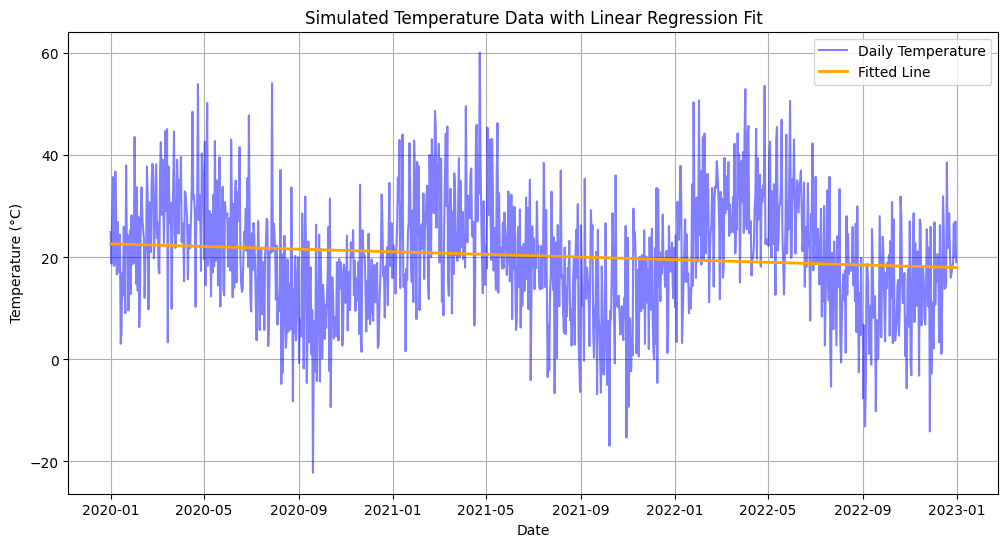

In [15]:
# fit a linear regression model to the data versus time
from sklearn.linear_model import LinearRegression
# Prepare the data for linear regression
X = np.arange(len(temperature_df)).reshape(-1, 1)  # Time as a feature
y = temperature_df['Temperature'].values  # Temperature as the target variable
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
# Get the slope and intercept of the fitted line
slope = model.coef_[0]
intercept = model.intercept_
# Print the slope and intercept
print(f"Linear Regression Model: Temperature = {slope:.2f} * Time + {intercept:.2f}")
# Predict temperature using the linear regression model
predicted_temperature = model.predict(X)
# Plot the original data and the fitted line
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(temperature_df.index, temperature_df['Temperature'], label='Daily Temperature', color='blue', alpha=0.5)
plt.plot(temperature_df.index, predicted_temperature, label='Fitted Line', color='orange', linewidth=2)
plt.title('Simulated Temperature Data with Linear Regression Fit')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()
# Save the DataFrame to a CSV file

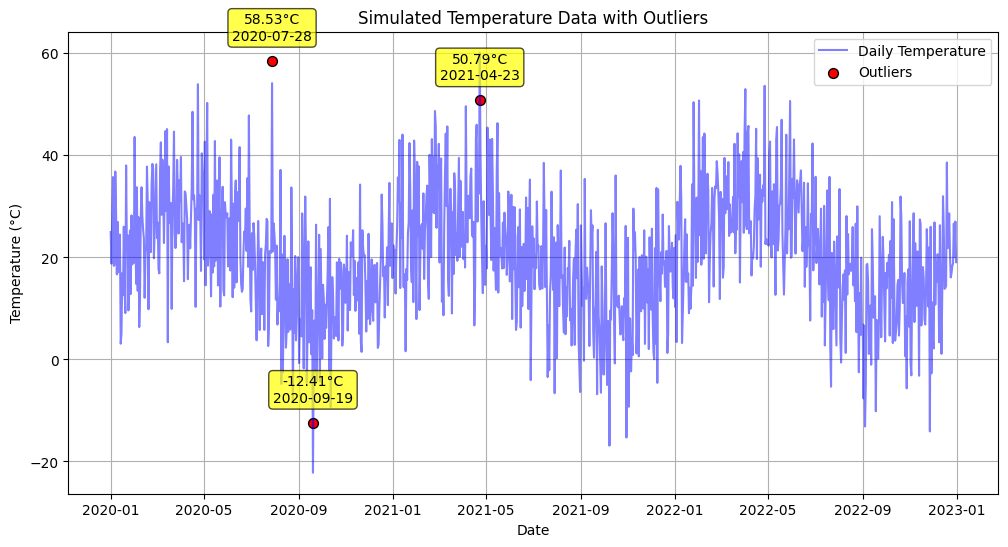

In [16]:
# identify and visualize the outliers in the data. Show them as circle markers in the plot
# and annotate each outlier with a box showing the temperature and date

plt.figure(figsize=(12, 6))
plt.plot(temperature_df.index, temperature_df['Temperature'], label='Daily Temperature', color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers['Temperature'], color='red', label='Outliers', s=50, edgecolor='black', marker='o')

# Annotate each outlier
for idx, row in outliers.iterrows():
    plt.annotate(
        f"{row['Temperature']:.2f}°C\n{idx.strftime('%Y-%m-%d')}",
        (idx, row['Temperature']),
        textcoords="offset points",
        xytext=(0, 15),
        ha='center',
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.7)
    )

plt.title('Simulated Temperature Data with Outliers')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()
temperature_df.to_csv('simulated_temperature_data.csv')
# Save the monthly statistics to a CSV file